## Complexity of the sowftware

In [1]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd

### Data Acquisition Details

This data was acquired by running the program on a High-Performance Computing (HPC) node.

### Bounding Boxes

We used four different bounding boxes, all centered at the same point but with varying sizes:

- **Bounding Box 1:** (48.5826, 7.7464, 48.5834, 7.7500), Area: 153.7 m²
- **Bounding Box 2:** (48.5811, 7.7450, 48.5840, 7.7512), Area: 384.0 m²
- **Bounding Box 3:** (48.5799, 7.7442, 48.5858, 7.7523), Area: 626.1 m²
- **Bounding Box 4:** (48.5800, 7.7412, 48.5859, 7.7547), Area: 808.4 m²

### Levels of Detail (LODs)

For each bounding box, the program was run for the following Levels of Detail (LODs):

- **LOD 0**
- **LOD 1**
- **LOD 2**
- **LOD 3**

### CGAL Wrapper Parameter: Alpha

The alpha parameter for the CGAL wrapper was set as follows for each LOD:

- **LOD 0:** 0.1
- **LOD 1:** 20
- **LOD 2:** 50
- **LOD 3:** 100

In [2]:
data = pd.read_csv("metrics.csv")

### Area as the Main Feature

Since we're using the area as our main feature (because it is the one we control when meshing an area), we want to examine how the area (in m²) relates to the number of trees available.

It is important to note that this relationship highly depends on the configuration of the environment. In urban settings, trees are not usually evenly distributed (e.g., avenues, parks, etc.), so we cannot always expect a linear relationship between the area and the number of trees.

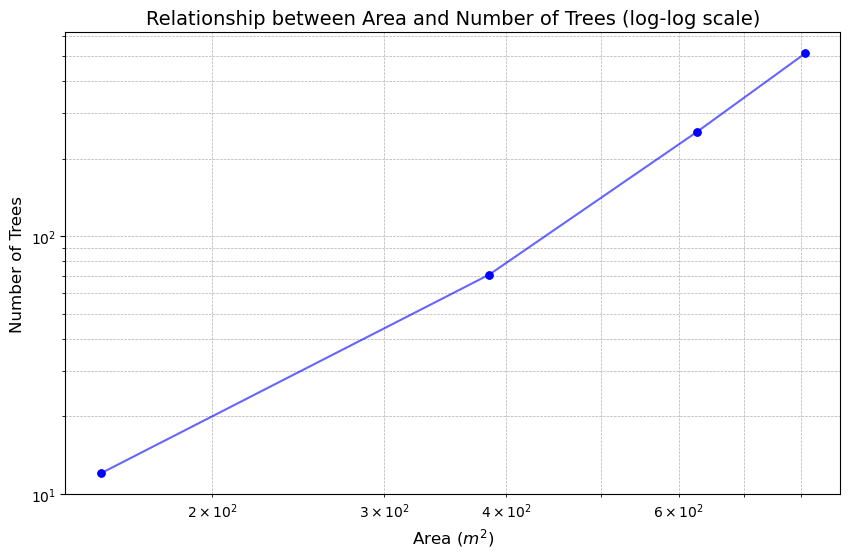

In [3]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the data
plt.plot(data['area'], data['ntree'], color='blue', alpha=0.6, marker='o', linestyle='-', markersize=5)

# Set the title and labels
plt.title('Relationship between Area and Number of Trees (log-log scale)', fontsize=14)
plt.xlabel('Area ($m^2$)', fontsize=12)
plt.ylabel('Number of Trees', fontsize=12)

# Set the scales to logarithmic
plt.xscale('log')
plt.yscale('log')

# Enable grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

### Analysis of the Plot

Since the plot is a line on a log-log scale, we can infer that the relationship between the number of trees and the area (in square meters) follows a power law.

### Impact of Level of Detail (LOD)

The Level of Detail (LOD) we chose has a significant impact. Since we did not select the LODs in a linear fashion, we aim to examine how the different LODs are related to the number of faces produced in the meshes.

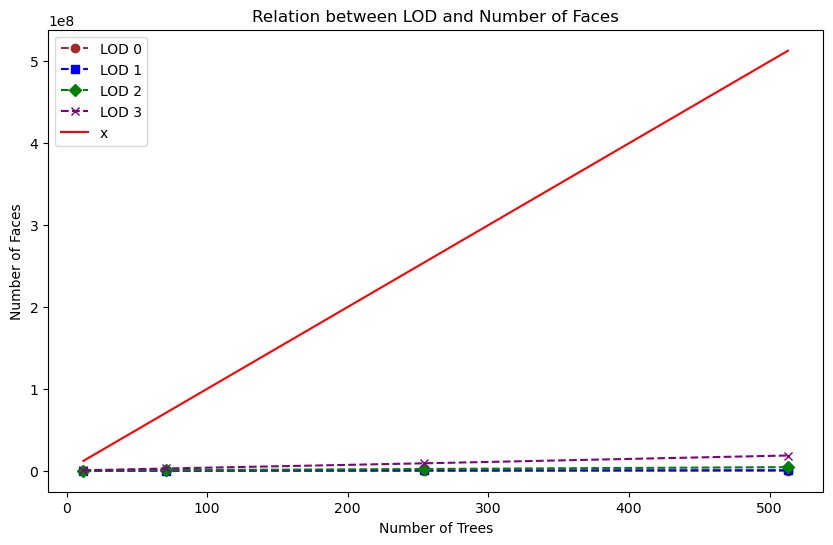

In [13]:
plt.figure(figsize=(10, 6))

# Define colors and markers for different LODs
colors = ['brown', 'blue', 'green', 'purple']
markers = ['o', 's', 'D', 'x']
lods = [0, 1, 2, 3]



for i, lod in enumerate(lods):
    lod_data = data[data['lod'] == lod]
    plt.plot(lod_data['ntree'], lod_data['nfaces'], marker=markers[i], 
             color=colors[i], linestyle='--', label=f'LOD {lod}')
    
x = lod_data['ntree']
y = 1e4*x

plt.plot(x, y, color='red', linestyle='-', label=f'x')

plt.title('Relation between LOD and Number of Faces')
plt.xlabel('Number of Trees')
plt.ylabel('Number of Faces')
plt.legend()
plt.show()

### Relationship between Number of Faces and LOD

The relationship between the number of faces and the Level of Detail (LOD) is linear. This plot clearly illustrates our choice of LODs, with the last one being significantly more detailed.

### Benchmarking Meshing Time per LOD

Finally, we aim to benchmark the time it takes to mesh the area for each Level of Detail (LOD).

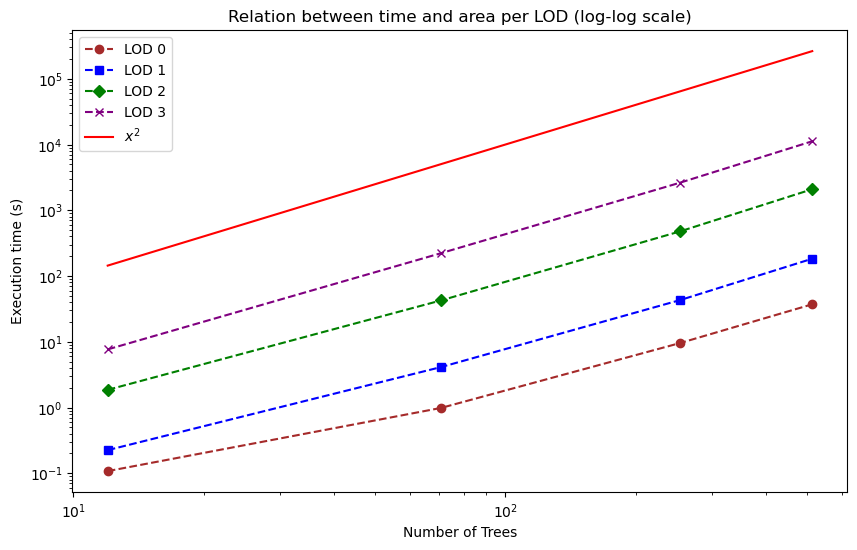

In [9]:
plt.figure(figsize=(10, 6))

# Define colors and markers for different LODs
colors = ['brown', 'blue', 'green', 'purple']
markers = ['o', 's', 'D', 'x']
lods = [0, 1, 2, 3]

for i, lod in enumerate(lods):
    lod_data = data[data['lod'] == lod]
    plt.plot(lod_data['ntree'], lod_data['time'], 
             marker=markers[i], color=colors[i], linestyle='--', label=f'LOD {lod}')
    
x = lod_data['ntree']
y = x**2

plt.plot(x, y, color='red', linestyle='-', label=f'$x^2$')

plt.yscale('log')
plt.xscale('log')
plt.title('Relation between time and area per LOD (log-log scale)')
plt.xlabel(f'Number of Trees')
plt.ylabel('Execution time (s)')
plt.legend()
plt.show()

### Observing the Relationship

Again, this relationship appears to follow a power law. To confirm this with greater precision, we would need more data.